In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
from twitter.twitter_collection import TwitterCollection
from twitter.tweet_sentiment_analyzer import TweetSentimentAnalyzer
from data_pipelines.data_manipulation import DataManipulation
from logger.logger import Logger

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = pd.errors.PerformanceWarning)
%matplotlib inline

Python-dotenv could not parse statement starting at line 11
[nltk_data] Downloading package stopwords to /home/kozan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
SYMBOL = 'BTC-USD'
SYMBOL_NAME = 'Bitcoin'
SYMBOL_CUT = 'btc'
scale = 1
range_list = [5,6,7,8,10,15,20]
range_list = [i*scale for i in range_list]
interval = '1d'
start_date = '2020-06-30'
end_date = '2022-06-30'
source = 'yahoo'
LOG_PATH = '../logger' + os.sep + "logs"
LOG_FILE_NAME_PREFIX = f"log_{SYMBOL_CUT}_{start_date}_{end_date}"

logger = Logger(LOG_PATH, LOG_FILE_NAME_PREFIX)
tsa = TweetSentimentAnalyzer()
data = DataManipulation(SYMBOL, source, range_list, start_date=start_date, 
                        end_date=end_date, interval=interval, scale=scale, 
                        prefix_path='..', saved_to_csv=True,
                        logger=logger)
df_price = data.df.copy()

1 ) 08-12-2022 22_44_00 MainThread INFO\ Initialized logging at path ../logger/logs/log_btc_2020-06-30_2022-06-30_08-12-2022_22_44_00.log
2 ) 08-12-2022 22_44_00 MainThread DEBUG\ Get data from local file ../data/outputs/data_ind/BTC-USD/BTC-USD_df_2020-06-30_2022-06-30_1d.csv


In [4]:
df_price_ext = data.extract_features()
close_col = df_price.loc['2021-01-01':'2022-06-27',['close','volume']].copy()

In [5]:
sent_tweets = pd.read_csv('btc_archieve/btc_daily_sent_score.csv')
sent_tweets.Date = pd.to_datetime(sent_tweets.Date)
sent_tweets.set_index('Date', inplace=True, drop=True)

In [6]:
df_final = tsa.concat_ohlc_compound_score(df_price_ext, sent_tweets)
df_final = df_final.loc['2021-01-01':,:].copy()
df_final.dropna(inplace=True)

In [7]:
data.normalized_df(df_final, 'compound_total')
data.normalized_df(df_final, 'kz_score')
df_final.tail()

,st_stoch,st_ich,st_cut_ema5_sma10,st_macd,st_ich_close,st_dmi,st_cut_sma10_close,st_hisse,st_mfi,st_fishert,...,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,feature_label,kz_score,compound_total
2022-06-23,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,...,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.4500,0.2979
2022-06-24,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,...,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.4937,0.2915
2022-06-25,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,...,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.5593,0.2754
2022-06-26,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,...,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.4853,0.3340
2022-06-27,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,...,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.3550,0.3223


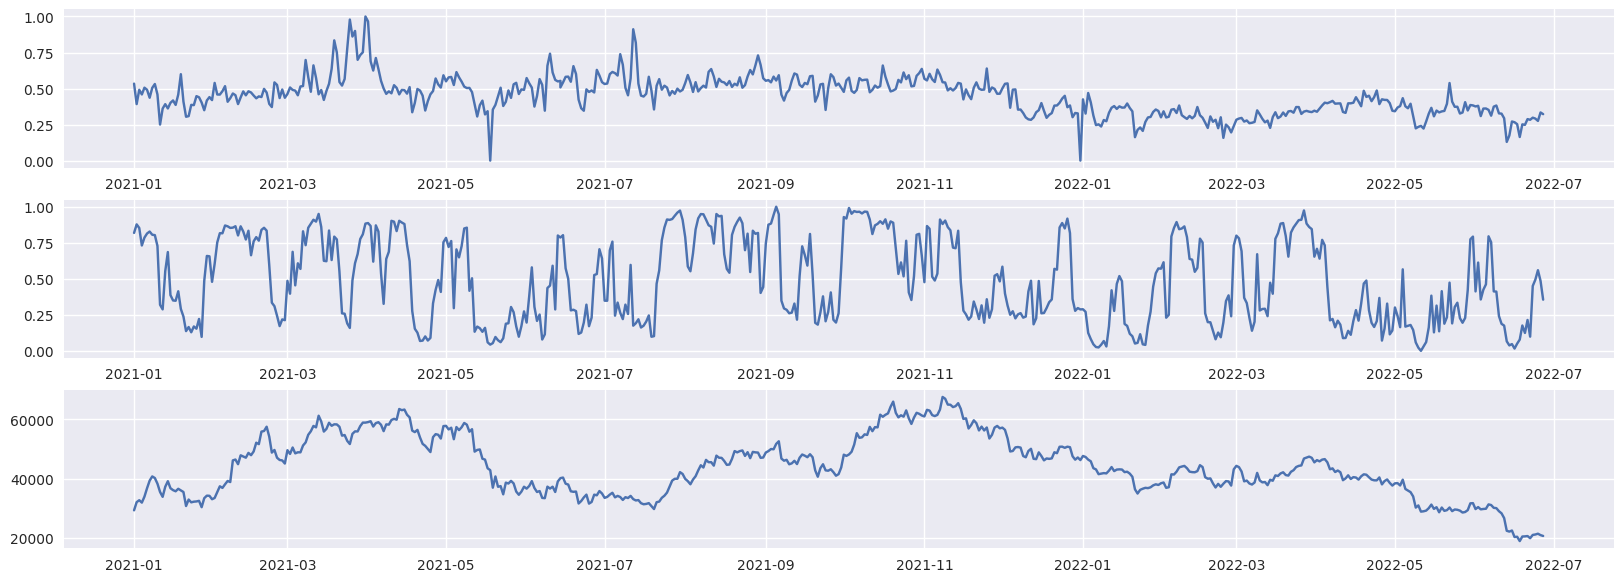

In [8]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(20,7))
ax1.plot(df_final.compound_total)
ax2.plot(df_final.index, df_final.kz_score)
ax3.plot(close_col.index, close_col.close)

In [9]:
df = df_final.copy()
df.reset_index(drop=True, inplace=True)
df.head()

,st_stoch,st_ich,st_cut_ema5_sma10,st_macd,st_ich_close,st_dmi,st_cut_sma10_close,st_hisse,st_mfi,st_fishert,...,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,feature_label,kz_score,compound_total
0,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.8182,0.5340
1,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.8774,0.3921
2,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.8525,0.4913
3,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.7312,0.4590
4,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7857,0.5060


In [10]:
y = df.feature_label
X = df.drop(columns=['feature_label'], axis=1)

In [11]:
X

,st_stoch,st_ich,st_cut_ema5_sma10,st_macd,st_ich_close,st_dmi,st_cut_sma10_close,st_hisse,st_mfi,st_fishert,...,log_return,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,kz_score,compound_total
0,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,0.0128,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.8182,0.5340
1,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,0.0896,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.8774,0.3921
2,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,0.0202,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.8525,0.4913
3,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,-0.0250,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.7312,0.4590
4,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,0.0613,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7857,0.5060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,...,0.0535,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.4500,0.2979
540,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,...,0.0069,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.4937,0.2915
541,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,...,0.0127,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.5593,0.2754
542,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,...,-0.0223,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.4853,0.3340


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)
model = XGBClassifier(n_estimators=150, tree_method='gpu_hist', eta=0.3, 
                    subsample=0.5, colsample_bytree=0.5, max_depth=1)
evalset = [(X_train, y_train), (X_test,y_test)]

model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
model.save_model('model_file_name.json')
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

[0]	validation_0-logloss:0.68911	validation_1-logloss:0.69630
[1]	validation_0-logloss:0.68584	validation_1-logloss:0.70052
[2]	validation_0-logloss:0.68288	validation_1-logloss:0.69775
[3]	validation_0-logloss:0.68104	validation_1-logloss:0.69495
[4]	validation_0-logloss:0.68086	validation_1-logloss:0.70241
[5]	validation_0-logloss:0.67900	validation_1-logloss:0.70326
[6]	validation_0-logloss:0.67665	validation_1-logloss:0.70905
[7]	validation_0-logloss:0.67385	validation_1-logloss:0.70104
[8]	validation_0-logloss:0.67403	validation_1-logloss:0.69964
[9]	validation_0-logloss:0.67063	validation_1-logloss:0.70422
[10]	validation_0-logloss:0.66976	validation_1-logloss:0.71385
[11]	validation_0-logloss:0.66653	validation_1-logloss:0.70822
[12]	validation_0-logloss:0.66364	validation_1-logloss:0.71089
[13]	validation_0-logloss:0.66189	validation_1-logloss:0.70878
[14]	validation_0-logloss:0.65937	validation_1-logloss:0.70792
[15]	validation_0-logloss:0.66025	validation_1-logloss:0.71664
[1

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib
matplotlib.use('Agg')

model = XGBClassifier(tree_method='gpu_hist')
n_estimators = range(50, 500, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1.160018 using {'n_estimators': 150}
nan (nan) with: {'n_estimators': 50}
nan (nan) with: {'n_estimators': 100}
-1.160018 (0.162153) with: {'n_estimators': 150}
-1.203406 (0.178404) with: {'n_estimators': 200}
-1.230537 (0.183767) with: {'n_estimators': 250}
-1.249762 (0.192505) with: {'n_estimators': 300}
-1.266708 (0.200659) with: {'n_estimators': 350}
-1.278082 (0.207808) with: {'n_estimators': 400}
-1.290013 (0.212498) with: {'n_estimators': 450}


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

# grid search
model = XGBClassifier(tree_method='gpu_hist')
max_depth = range(1, 16, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold,
verbose=1)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

range(1, 16, 2)
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best: -0.727749 using {'max_depth': 1}
-0.727749 (0.037808) with: {'max_depth': 1}
-0.923833 (0.146055) with: {'max_depth': 3}
-1.083117 (0.188586) with: {'max_depth': 5}
-1.125293 (0.173173) with: {'max_depth': 7}
-1.118913 (0.157413) with: {'max_depth': 9}
-1.124583 (0.149866) with: {'max_depth': 11}
-1.151065 (0.177375) with: {'max_depth': 13}
-1.136255 (0.179966) with: {'max_depth': 15}


In [25]:
model = XGBClassifier(tree_method='gpu_hist')
n_estimators = [50, 100, 150, 200, 500, 1000]
max_depth = [1, 2, 4, 6, 8, 12, 16]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold,
verbose=1)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# plot results
import numpy
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))

[1, 2, 4, 6, 8, 12, 16]
Fitting 10 folds for each of 42 candidates, totalling 420 fits
Best: -0.710806 using {'max_depth': 1, 'n_estimators': 50}
-0.710806 (0.026897) with: {'max_depth': 1, 'n_estimators': 50}
-0.727749 (0.037808) with: {'max_depth': 1, 'n_estimators': 100}
-0.741367 (0.044625) with: {'max_depth': 1, 'n_estimators': 150}
-0.752994 (0.053147) with: {'max_depth': 1, 'n_estimators': 200}
-0.812735 (0.090329) with: {'max_depth': 1, 'n_estimators': 500}
-0.885510 (0.135389) with: {'max_depth': 1, 'n_estimators': 1000}
-0.762829 (0.086439) with: {'max_depth': 2, 'n_estimators': 50}
-0.838741 (0.119583) with: {'max_depth': 2, 'n_estimators': 100}
-0.879032 (0.152673) with: {'max_depth': 2, 'n_estimators': 150}
-0.932598 (0.173670) with: {'max_depth': 2, 'n_estimators': 200}
-1.187421 (0.276658) with: {'max_depth': 2, 'n_estimators': 500}
-1.447531 (0.333858) with: {'max_depth': 2, 'n_estimators': 1000}
-0.882228 (0.148361) with: {'max_depth': 4, 'n_estimators': 50}
-1.025589 